**실습3**
### **winequality_red 데이터를 이용한 <span style="color:darkgreen">AI분류</span> 문제**
---

#### 와인의 성분 데이터를 이용하여 와인 등급을 분류하는 AI 문제입니다.
#### AI코딩 단계에 따라 주어지는 문제를 읽고 답안을 작성하세요.
 - 데이터 : 분류(카테고리)
 - 모델 : RandomForest(머신러닝 모델 비교 분석 추가), DeepLearning
 - 주요 전처리 : 분석 Column 추가, 정규화(normalization), label 전처리(카테고리 → 수치화)
 - 주요 학습 내용 : 산점도, 분류 모델 생성(분류방법, input, output 처리, 손실함수 등), 머신러닝 모델 비교학습(리스트 활용)
---





**winequality_red.csv / 에이드 판매 데이터 컬럼 설명**
- fixed acidity : 고정산 농도
- volatile acidity : 휘발산 농도
- citric acid : 구연산 농도
- residual sugar : 잔류 당분 농도
- chlorides : 염화물 농도
- free sulfur dioxide : 유리 아황산 농도
- total sulfur dioxide : 총 아황산 노도
- density : 밀도
- pH : pH, 수소이온농도지수
- sulphates : 황산염 농도
- alcohol : 알코올 도수
- quality : 와인 등급 0 ~ 10, integer
    * 현재 데이터는 3,4,5,6,7,8 만 있다.

---
> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행해주시기 바랍니다.**<br>
> - AIDU 사용을 위한 AIDU 환경변수를 선언을 하는 코드. <span style="color:darkgreen"></span><br>
---

In [1]:

# AIDU 내부 연동을 위한 라이브러리
from aicentro.session import Session
from aicentro.framework.keras import Keras as AiduFrm
# AIDU와 연동을 위한 변수
aidu_session = Session(verify=False)
aidu_framework = AiduFrm(session=aidu_session)

### **Q1. Pandas를 pd로 alias하여 사용할 수 있도록 불러오는 코드를 작성하고 실행하시기 바랍니다.**
---

In [2]:
import pandas as pd

### **Q2.Matplotlib의 pyplot을 plt로 alias하여 사용할 수 있도록 불러오는 코드를 작성하고 실행하시기 바랍니다.**
---

In [3]:
import matplotlib.pyplot as plt

### **Q3.winequality_red.csv를 판다스 데이터 프레임으로 불러와서 wine에 선언하는 코드를 작성하고 실행하시기 바랍니다.**
- 해당 csv는 string 형식으로 저장되어 있으며 ';' 기호로 항목을 분리해줘야 합니다.
---

In [4]:
wine = pd.read_csv(aidu_framework.config.data_dir + '/winequality_red.csv', sep=';')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### **Q4. 데이터 프레임 wine의 처음 5개 행을 조회하는 코드를 작성하고 데이터가 올바르게 불러와졌는지 확인하시기 바랍니다.**
---

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### **Q5. 데이터 프레임 wine의 alcohol 컬럼을 히스토그램으로 시각화 하시기 바랍니다.**

* **
- 시각화를 위해 데이터를 10개 구간으로 나눈다.
---

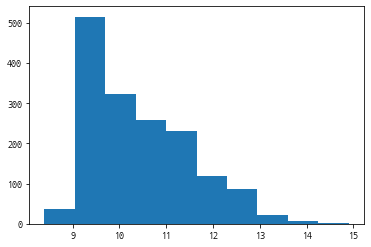

In [6]:
plt.hist(wine['alcohol'], bins=10)
plt.show()

### **Q6. 다음 조건에 맞추어 데이터 프레임 wine에 새로운 컬럼 rat_ca를 제작하시기 바랍니다.**

* **
- rat_ca 는 구연산 농도(citric acid를 알코올 도수(alcohol)로 나눈 값으로 정의한다.
---

In [7]:
wine['rat_ca'] = wine['citric acid'] / wine['alcohol']
wine['rat_ca']

0       0.000000
1       0.000000
2       0.004082
3       0.057143
4       0.000000
          ...   
1594    0.007619
1595    0.008929
1596    0.011818
1597    0.011765
1598    0.042727
Name: rat_ca, Length: 1599, dtype: float64

### **Q7. 데이터 프레임 wine의 컬럼 rat_ac를 x축, quality를 y축으로 하는 산점도를 시각화 하시기 바랍니다.**

---

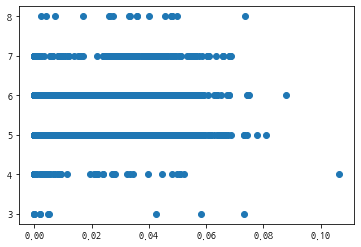

In [8]:
plt.scatter(wine['rat_ca'], wine['quality'])
plt.show()

### **Q8. 다음 조건에 맞추어 데이터 프레임 wine에 새로운 컬럼 rat_r2a를 제작하시기 바랍니다.**

* **
- rat_r2a 는 잔류 당분 농도(residual sugar)의 제곱을 알코올 도수(alcohol)로 나눈 값으로 정의한다.
---

In [9]:
wine['rat_r2a'] = wine['residual sugar'] ** 2 / wine['alcohol']
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rat_ca,rat_r2a
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.000000,0.384043
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.000000,0.689796
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.004082,0.539796
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.057143,0.368367
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.000000,0.384043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.007619,0.380952
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0.008929,0.432143
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.011818,0.480909
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.011765,0.392157


### **Q9. 데이터 프레임 wine의 컬럼 rat_r2a를 x축으로 quality를 y축으로 하는 산점도를 시각화 하시기 바랍니다.**

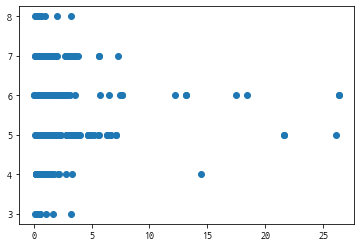

In [10]:
plt.scatter(wine['rat_r2a'], wine['quality'])
plt.show()

### **Q10. 다음 조건에 맞추어 데이터 프레임 wine에 새로운 컬럼 rat_cta를 제작하시기 바랍니다.**

* **
- rat_cta 는 구연산 농도를 (구연산+고정산+휘발산)농도로 나눈 값으로 정의한다.
- 구연산 : citric acid, 휘발산 : volatile acidity, 고정산 : fixed activity
---

In [11]:
wine['rat_cta'] = wine['citric acid'] / (wine['citric acid'] + wine['fixed acidity'] + wine['volatile acidity'])
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rat_ca,rat_r2a,rat_cta
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.000000,0.384043,0.000000
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.000000,0.689796,0.000000
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.004082,0.539796,0.004651
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.057143,0.368367,0.046512
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.000000,0.384043,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.007619,0.380952,0.011628
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0.008929,0.432143,0.015267
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.011818,0.480909,0.018732
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.011765,0.392157,0.018005


### **Q11. 데이터 프레임 wine의 컬럼 rat_cta를 x축으로 컬럼 quality를 y축으로 하는 산점도를 시각화 하시기 바랍니다.**

* **
- plot에 grid(격자 표시)를 추가하시오.
---

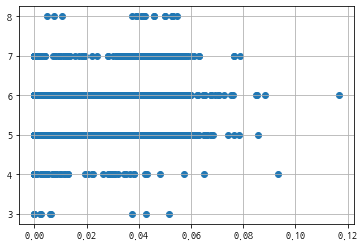

In [12]:
plt.scatter(wine['rat_cta'], wine['quality'])
plt.grid(True)
plt.show()

### **Q12. 데이터 프레임 wine의 컬럼 density와 pH를 표준화(standardization) 하시기 바랍니다**

---

In [13]:
from sklearn.preprocessing import StandardScaler

ss_d = StandardScaler()
ss_p = StandardScaler()

wine['density'] = ss_d.fit_transform(wine['density'].values.reshape(-1, 1))
wine['pH'] = ss_p.fit_transform(wine['pH'].values.reshape(-1, 1))
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rat_ca,rat_r2a,rat_cta
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1.599000e+03,1.599000e+03,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,2.364032e-14,2.861723e-15,0.658149,10.422983,5.636023,0.026060,0.819801,0.028068
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,1.000313e+00,1.000313e+00,0.169507,1.065668,0.807569,0.018634,1.803311,0.018390
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,-3.538731e+00,-3.700401e+00,0.330000,8.400000,3.000000,0.000000,0.063780,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,-6.077557e-01,-6.551405e-01,0.550000,9.500000,5.000000,0.008964,0.348387,0.011734
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,1.760083e-03,-7.212705e-03,0.620000,10.200000,6.000000,0.025397,0.460800,0.029879
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,5.768249e-01,5.759223e-01,0.730000,11.100000,6.000000,0.039593,0.653333,0.041451
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,3.680055e+00,4.528282e+00,2.000000,14.900000,8.000000,0.106383,26.351111,0.116592


### **Q13. 데이터를 트레이닝셋 / 테스트셋으로 분할하시기 바랍니다.**
* **
- y는 wine데이터 프레임의 quality컬럼이다. x는 그 나머지 컬럼들이다.
- train : test = 9 : 1
- y의 클래스가 골고루 분할되도록 stratify하게 분할한다.
- 변수명 규칙은 다음과 같다.
    * x_train, y_train
    * x_test, y_test
- random state, seed 등은 2021로 설정한다.
---

In [14]:
from sklearn.model_selection import train_test_split

x = wine.drop(columns=['quality']).values
y = wine['quality'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y, random_state=2021)

### **Q14. 트레이닝 데이터를 트레이닝셋 / 벨리데이션셋으로 분할하시기 바랍니다.**
* **
- x_train, y_train을 이용한다.
- train : validation = 8 : 1
- y_train의 클래스가 골고루 분할되도록 stratify하게 분할한다.
- 변수명 규칙은 다음과 같다.
    * x_train, y_train
    * x_valid, y_valid
- random state, seed 등은 2021로 설정한다.
---

In [15]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=1/9, random_state=2021)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(x_test.shape)
print(wine.shape)

(1279, 14)
(1279,)
(160, 14)
(160, 14)
(1599, 15)


### **Q15. RandomForest 모델들을 학습시키시기 바랍니다.**
* **
- RandomForestClassifier 하이퍼파라미터 설정 :  n_estimators=나무의 개수, max_depth=13(각 Tree의 max depth),min_samples_leaf=5(한개의 node에 최소의 데이터 개수, 5개면 tree depth를 늘리지 않음) random_state=30
- 와인의 퀄리티를 '분류'모델링 한다.
- 트레이닝 셋 (x_train, y_train)을 이용하여 학습시킨다.
- 나무의 개수를 1에서 50까지 늘려가며 학습한다.
- 학습시킨 랜덤포레스트들은 리스트를 만들어 forests 변수에 담아둔다.
- seed나 random_state는 2021로 고정한다.
---

In [17]:
from sklearn.ensemble import RandomForestClassifier

forests = []
for i in range(1, 51):
    rfc = RandomForestClassifier(n_estimators=i, max_depth=13, random_state=2021, min_samples_leaf=5)
    forests.append(rfc)

In [18]:
forests[49]

RandomForestClassifier(max_depth=13, min_samples_leaf=5, n_estimators=50,
                       random_state=2021)

### **Q16. RandomForest 모델들의 성능을 리스트에 담아 accs에 선언하시기 바랍니다.**
* **
- 위에 저장한 randomforest 값들을 불러온다.(forest list를 활용한다. forests[i] 형태)
- for 문 함수를 사용하여, 각 모델에 대한 valid set에 대한 acc를 확인한다.(score 함수 활용)
- 벨리데이션 셋 위에서 성능을 평가한다.
- append를 통해 accs list의 값에 계속 해당 성능 값을 추가한다.
---

In [19]:
accs = []
for i in range(len(forests)):
    forests[i].fit(x_valid, y_valid)
    acc = forests[i].score(x_valid, y_valid)
    accs.append(acc)

accs

[0.65,
 0.68125,
 0.75625,
 0.75625,
 0.775,
 0.7625,
 0.75625,
 0.78125,
 0.79375,
 0.78125,
 0.78125,
 0.78125,
 0.78125,
 0.79375,
 0.7875,
 0.7625,
 0.7625,
 0.775,
 0.7625,
 0.76875,
 0.775,
 0.7875,
 0.7875,
 0.79375,
 0.8,
 0.79375,
 0.7875,
 0.7875,
 0.7875,
 0.79375,
 0.7875,
 0.79375,
 0.7875,
 0.7875,
 0.79375,
 0.7875,
 0.78125,
 0.775,
 0.775,
 0.76875,
 0.76875,
 0.76875,
 0.76875,
 0.76875,
 0.7625,
 0.75625,
 0.76875,
 0.76875,
 0.78125,
 0.76875]

### **Q17. RandomForest의 Tree 개수에 따른 accuracy를 시각화하시기 바랍니다.**
* **
- 위의 Q17에서 제작한 리스트 accs를 이용한다.
- line plot을 이용하여 각 모델 별 accuracy를 출력한다.
- 동일 성능의 gamma가 여러개라면 가장 작은걸 택한다.
---

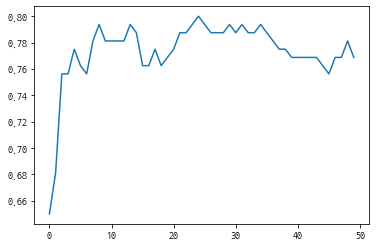

In [20]:
plt.plot(accs)
plt.show()

> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행하세요.**
>

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping

### **Q17. 아래 조건에 맞추어 뉴럴네트워크 모델을 학습시키시기 바랍니다.**
* **
- Tensorflow framework를 사용한다.
- 히든레이어는 아래와 같은 규칙에 맞추어 구성합니다.
    * 2개의 fully connected layer를 사용할 것, 노드는 인풋레이어 노드의 2이상으로 한다.
- Early stopping을 이용하여, validation loss가 50번 이상 개선되지 않으면 학습을 중단 시키고, 가장 성능이 좋았을 때의 가중치를 복구한다.
- 학습과정의 로그(loss, accuracy)를 history에 선언하여 남긴다.
- y를 별도로 원핫인코딩 하지 않고 분류모델을 학습시킬 수 있도록 한다.
    * 데이터에 없는 클래스까지 고려하여, 아웃풋레이어의 노드를 10개로 지정한다.
- epochs는 2000번을 지정한다.
---

In [22]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(14,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=50, mode='min', verbose=1, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=2000, callbacks=[es], validation_data=(x_valid, y_valid), verbose=1)

Epoch 1/2000
40/40 [==============================] - 0s 7ms/step - loss: 2.4283 - accuracy: 0.3675 - val_loss: 1.2512 - val_accuracy: 0.5312
Epoch 2/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2130 - accuracy: 0.4918 - val_loss: 1.1439 - val_accuracy: 0.4750
Epoch 3/2000
40/40 [==============================] - 0s 3ms/step - loss: 1.1711 - accuracy: 0.4949 - val_loss: 1.1184 - val_accuracy: 0.5000
Epoch 4/2000
40/40 [==============================] - 0s 5ms/step - loss: 1.1484 - accuracy: 0.5090 - val_loss: 1.0976 - val_accuracy: 0.5000
Epoch 5/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.1469 - accuracy: 0.4887 - val_loss: 1.0915 - val_accuracy: 0.5063
Epoch 6/2000
40/40 [==============================] - 0s 3ms/step - loss: 1.1372 - accuracy: 0.4949 - val_loss: 1.0865 - val_accuracy: 0.4812
Epoch 7/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.1202 - accuracy: 0.5184 - val_loss: 1.1310 - val_accuracy: 0.5250
Epoch 

### **Q20. 다음 조건에 맞추어 뉴럴네트워크의 학습 로그를 시각화 하시오.**
* **
- 필요한 라이브러리가 있다면 따로 불러온다.
- epochs에 따른 accuracy의 변화를 시각화 한다.
- train accuracy와 validation accuracy를 전부 시각화하고, 구별가능해야 한다.
- 그래프의 타이틀은 'Accuracy'로 표시한다.
- x축에는 'epochs'라고 표시하고 y축에는 'accuracy'라고 표시한다.
---

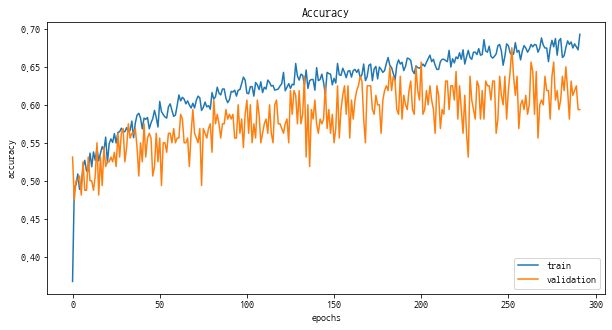

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()